In [1]:
from google.colab import files
uploaded = files.upload()

Saving img1.jpg to img1.jpg
Saving img2.jpg to img2.jpg


# Image Addition

In [2]:
# We can add two images by OpenCV function, cv2.add() or simply by numpy operation,
# res = img1 + img2. Both images should be of same depth and type, or second image can just be a scalar value.
# Importing required modules
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Considering both the imgaes of indentical size 500 x 250
img1 = cv2.imread('img1.jpg')
img2 = cv2.imread('img2.jpg')
add = img1+img2
cv2_imshow(add)


Output hidden; open in https://colab.research.google.com to view.

In [4]:
# Importing required modules
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Considering both the imgaes of indentical size 500 x 250
img1 = cv2.imread('img1.jpg')
img2 = cv2.imread('img2.jpg')
add = cv2.add(img1,img2)
cv2_imshow(add)
cv2.waitKey(0)
cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

# Image Blending

In [5]:
#### This is also image addition, but different weights are given to images so that it gives a feeling of blending or transparency.
#### By varying alpha from 0-1, we can perform a cool transition between one image to another. Here I took two images to blend them together. First image is given a weight of 0.6 
#### and second image is given 0.4. cv2.addWeighted() applies .
#### Here gamma is taken as zero.
# Importing required modules
import cv2
import numpy as np
# Considering both the imgaes of indentical size 500 x 250
img1 = cv2.imread('img1.jpg')
img2 = cv2.imread('img2.jpg')
weighted = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)
# Notation: addWeighted method, the parameters are the first image, the weight, the second image, that weight, and gamma, which is a measurement of light.
cv2_imshow(weighted)
cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

# To show the mask inverse using threshold

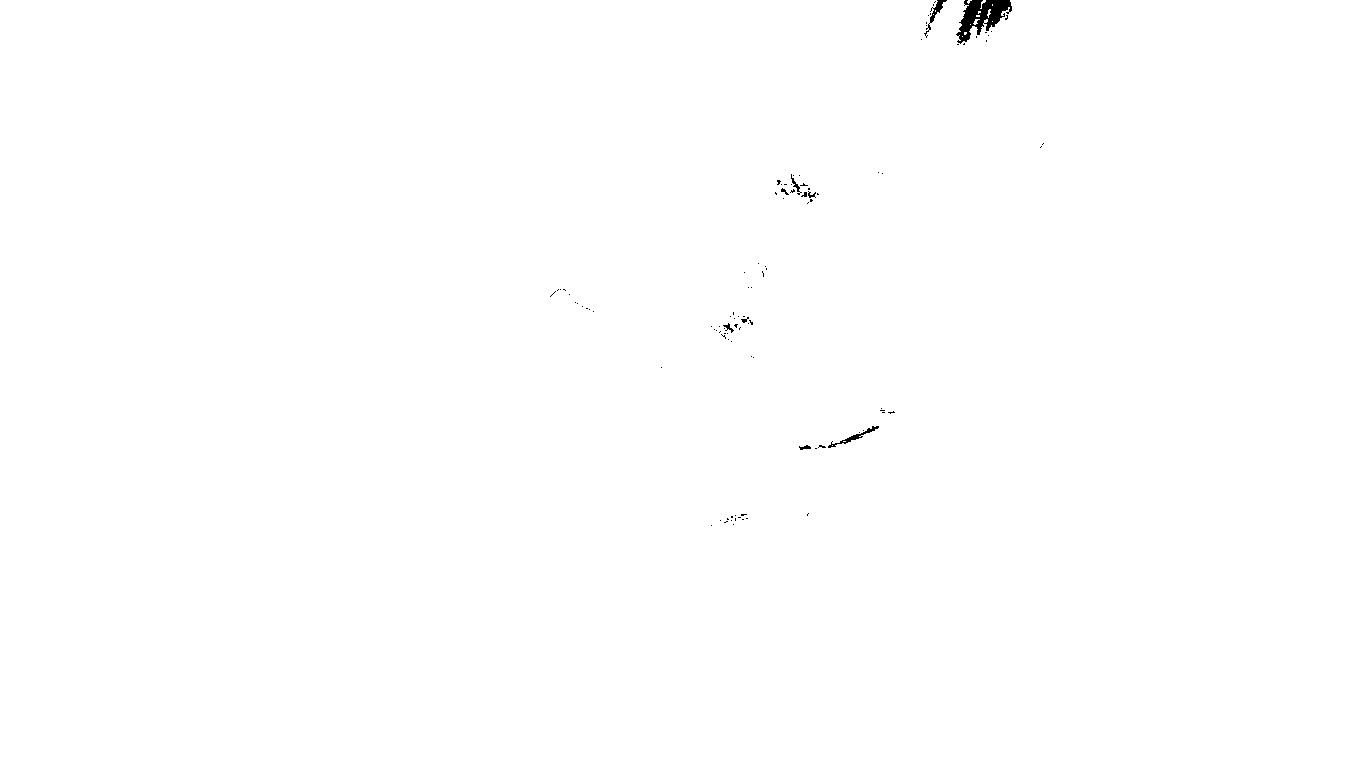

In [8]:
import cv2
import numpy as np
# Load two images
img1 = cv2.imread('img1.jpg')
img2 = cv2.imread('img2.jpg')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]
# Now create a mask of logo and create its inverse mask, mask generly would be to grey scale
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
# add a threshold
# Threshold: it works is that, it will convert all pixels to either black or white, based on a threshold value.
ret, mask = cv2.threshold(img2gray, 220, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Bitwise Operations

In [10]:
# Importing required modules
import cv2
import numpy as np
# Load two images
img1 = cv2.imread('img1.jpg')
img2 = cv2.imread('img2.jpg')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask, mask generly would be to grey scale
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
# add a threshold
# Threshold: it works is that, it will convert all pixels to either black or white, based on a threshold value.
ret, mask = cv2.threshold(img2gray, 220, 255, cv2.THRESH_BINARY_INV)
#This is a bitwise operation.black area of mask
mask_inv = cv2.bitwise_not(mask)
# bitwise_not : mask or not mask
# bitwise_and : when two are equal
# bitwise_or : When both values are true it runs, if only one value iss true it runs
# bitwise_xor : onle when one value is true
# we want to black out this area in the first image, and then take image 2 and replace it's contents in that empty spot.
# Now black-out the area of logo in ROI, bitwise is a lowlevel logical operation.
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2_imshow(img1)
cv2_imshow(mask_inv)
cv2_imshow(img1_bg)
cv2_imshow(img2_fg)
cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

# Performing bitwise operation with out using mask inverse

In [11]:
# Load two images
img1 = cv2.imread('img1.jpg')
img2 = cv2.imread('img2.jpg')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2_imshow(img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.